In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.neural_network import MLPClassifier




In [2]:
df = pd.read_csv ('/Users/dengyuxin/Downloads/train.csv') 
df.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df.isnull()  
df.columns[df.isnull().any()]

Index([], dtype='object')

In [5]:
X = df.loc[:, df.columns != 'label']
y = df.loc[:, df.columns == 'label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
df.dtypes['label']

dtype('int64')

In [7]:
labelencoder = LabelEncoder()
df["label"] = labelencoder.fit_transform(df["label"])
species = pd.DataFrame({'label': ['0', '1', '2','3','4','5','6','7','8','9']})


In [8]:
df.dtypes['label']

dtype('int64')

In [9]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
data = create_dummies(df,"label")


In [10]:
# Features before mean normalization
unscaled_features = X_train

sc = StandardScaler()
X_train_array = sc.fit_transform(X_train.values)


In [11]:
# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)


In [12]:
# Initializing the multilayer perceptron
mlp = MLPClassifier(20,solver='sgd',learning_rate_init= 0.01, max_iter=200)

mlp.fit(X_train, y_train)

mlp.score(X_test,y_test)


/Users/dengyuxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9434523809523809

In [13]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)


In [14]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[794   1   9   2   0   5   4   4   6   2]
 [  0 898   3   1   3   2   0   1   9   1]
 [  7  14 790  10   5   4   3  17   9   3]
 [  2   6  11 818   0  19   1   8  14   6]
 [  1   2   4   2 709   2   8   1   1  13]
 [  5   1   2  18   2 673   8   2   5   6]
 [  8   2   2   0   6  10 818   3   4   0]
 [  2   3   9   6   5   4   1 912   1  11]
 [  1   5   8  11   3  12   6   2 755   5]
 [  6   3   2   7  22   7   0  16   7 758]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       827
           1       0.96      0.98      0.97       918
           2       0.94      0.92      0.93       862
           3       0.93      0.92      0.93       885
           4       0.94      0.95      0.95       743
           5       0.91      0.93      0.92       722
           6       0.96      0.96      0.96       853
           7       0.94      0.96      0.95       954
           8       0.93      0.93      0.93       808
           9       0.94     

In [15]:
gbclass=GradientBoostingClassifier(random_state=0)
gbclass.fit(X_train,y_train)
gbypred=gbclass.predict(X_test)

gbclass.score(X_test, y_test)


/Users/dengyuxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9427380952380953

In [16]:
# KNN Classification 

#try K value from 1 to 10 to test accuracy
krange = range(1,11)
scores = {}
scores_list =[]
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] =metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
print(scores_list)

<ipython-input-16-44a71f72aab9>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-16-44a71f72aab9>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-16-44a71f72aab9>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-16-44a71f72aab9>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-16-44a71f72aab9>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

[0.9366666666666666, 0.9270238095238095, 0.9434523809523809, 0.9379761904761905, 0.9403571428571429, 0.9377380952380953, 0.9376190476190476, 0.9361904761904762, 0.935952380952381, 0.9347619047619048]


Text(0, 0.5, 'Testing Accuracy')

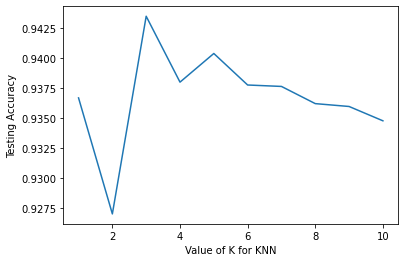

In [17]:
%matplotlib inline

#plot the relationship between K and the test accuracy
plt.plot(krange,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [18]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)


<ipython-input-18-2131a6ff91c0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[811   0   2   0   1   7   4   1   1   0]
 [  0 907   2   1   0   0   2   2   3   1]
 [  7  15 800  10   1   3   9  10   3   4]
 [  3   1  10 835   1  15   3   4  10   3]
 [  1   9   7   2 696   1   2   3   0  22]
 [  2   2   4  20   5 670  11   2   4   2]
 [ 12   0   4   0   1   9 826   1   0   0]
 [  2   6   8   2  12   0   0 892   1  31]
 [  6  11   6  11   6  23   4   2 730   9]
 [  5   4   6  12  17   3   0  21   2 758]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       827
           1       0.95      0.99      0.97       918
           2       0.94      0.93      0.94       862
           3       0.94      0.94      0.94       885
           4       0.94      0.94      0.94       743
           5       0.92      0.93      0.92       722
           6       0.96      0.97      0.96       853
           7       0.95      0.94      0.94       954
           8       0.97      0.90      0.93       808
           9       0.91     

In [21]:
#feature importance

regr1 = RandomForestRegressor(max_features=10, random_state=1)
regr1.fit(X, y)

<ipython-input-21-b3e7a07b71a8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr1.fit(X, y)


RandomForestRegressor(max_features=10, random_state=1)

pixel263    1.240018
pixel408    1.237645
pixel436    1.169836
pixel291    1.160917
pixel409    1.015390
              ...   
pixel449    0.000000
pixel476    0.000000
pixel477    0.000000
pixel504    0.000000
pixel0      0.000000
Length: 784, dtype: float64


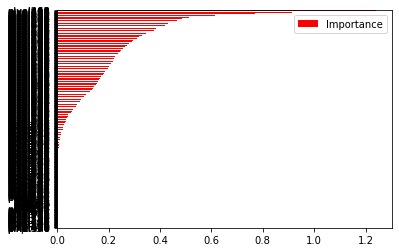

In [22]:
Importance = pd.DataFrame({'Importance':regr1.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
rel_imp = pd.Series(regr1.feature_importances_*100, index=X.columns).sort_values(inplace=False,ascending=False)
print(rel_imp)

In [23]:
print(rel_imp==0)

pixel263    False
pixel408    False
pixel436    False
pixel291    False
pixel409    False
            ...  
pixel449     True
pixel476     True
pixel477     True
pixel504     True
pixel0       True
Length: 784, dtype: bool
